In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
df = pd.read_csv("SupplyChainEmissionFactorsforUSIndustriesCommodities2015_Summary.csv")
print("Dataset loaded")
df = df[1:]
df = df.drop(columns=["Unnamed: 7"], errors='ignore')
df["Supply Chain Emission Factors with Margins"] = pd.to_numeric(
    df["Supply Chain Emission Factors with Margins"], errors='coerce'
)
df = df.dropna(subset=["Supply Chain Emission Factors with Margins", "Industry Name", "Substance"])
X = df[["Industry Name", "Substance"]]
y = df["Supply Chain Emission Factors with Margins"]
categorical_features = ["Industry Name", "Substance"]
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
model = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[('cat', categorical_transformer, categorical_features)]
    )),
    ('regressor', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Model trained. MSE: {mse:.4f}")
processed_data = pd.concat([X.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
processed_data.to_csv("pre_processed_data.csv", index=False)
print("Saved: pre_processed_data.csv")
with open("forecasting_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("Saved: forecasting_model.pkl")


Dataset loaded
Model trained. MSE: 0.2027
Saved: pre_processed_data.csv
Saved: forecasting_model.pkl


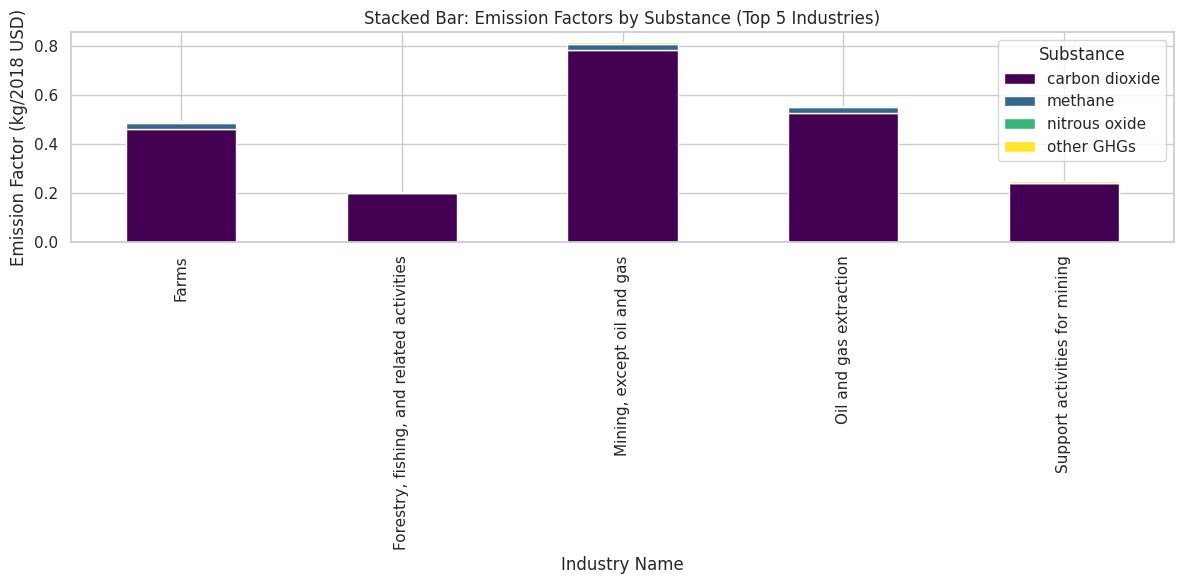

In [ ]:
top_industries = df['Industry Name'].value_counts().head(5).index
filtered_df = df[df['Industry Name'].isin(top_industries)]

pivot_df = filtered_df.pivot_table(
    index='Industry Name',
    columns='Substance',
    values='Supply Chain Emission Factors with Margins',
    aggfunc='sum'
).fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar: Emission Factors by Substance (Top 5 Industries)')
plt.ylabel('Emission Factor (kg/2018 USD)')
plt.xlabel('Industry Name')
plt.tight_layout()
plt.show()


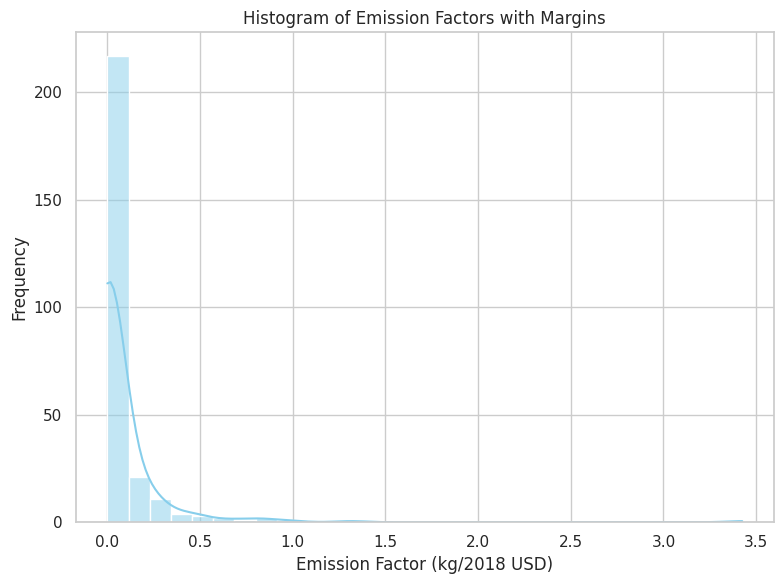

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Supply Chain Emission Factors with Margins'].dropna(), kde=True, bins=30, color='skyblue')
plt.title("Histogram of Emission Factors with Margins")
plt.xlabel("Emission Factor (kg/2018 USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
